In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [331]:
#import data in data frame
subbmission = pd.read_csv('./sample_submission_ejm25Dc.csv')
data = pd.read_excel('./Train/train_Data.xlsx')
data_test = pd.read_excel('./test_Data.xlsx')

In [531]:
#merging data into one large file to preprocess.
big_data = data.append(data_test)

In [532]:
#find a optimise way to do this 
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('PDC_E', 'PDC', regex=True)
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('Cheque', 'PDC', regex=True)

In [335]:
big_data['ZiPCODE'].isnull().sum()

373

In [336]:
big_data['ZiPCODE'].fillna(0,inplace=True)

In [337]:
big_data['ZiPCODE'].isnull().sum()

0

In [508]:
import pgeocode

In [554]:
nomi = pgeocode.Nominatim('in')

AttributeError: 'Nominatim' object has no attribute 'county_name'

In [555]:
nomi.query_postal_code(464993).county_name                                                  

'Bhopal'

In [547]:
big_data['ZiPCODE'].unique()

array([464993, 466001, 462030, ..., 245304, 245101, 331402])

In [561]:
nomi.query_postal_code(462030).county_name

'Bhopal'

In [563]:
uniq = big_data['ZiPCODE'].unique()
uniq_zip_dic = {}
for x in uniq:
    print(x)
    uniq_zip_dic[x]=nomi.query_postal_code(str(x)).county_name


464993
466001
462030
473335
495442
493885
493889
493114
493196
493344
492001
493116
493551
495009
495001
493195
493558
495224
493449
491441
493335
491995
493338
493554
764076
764059
764073
754141
764001
761005
763008
753008
754008
752050
754130
754022
754025
754028
764071
764074
764075
754110
759145
753010
764077
754004
766001
761144
751001
756010
754108
760010
752093
761104
752110
760003
754103
753003
751002
754021
752031
754001
754005
761014
751010
754016
761008
752104
761018
754120
754032
761111
764043
761032
823001
752105
754202
754102
754204
752106
763001
761013
752069
764072
764037
752027
764006
752108
752001
713423
731101
713359
713368
722122
713315
713362
722102
731133
722138
713166
713338
713360
712121
713363
713212
713347
713373
712157
731130
722158
722202
713358
722205
713334
712402
712423
712305
713378
731129
712413
713147
713323
713322
713144
712302
713384
712614
722143
722207
713428
722201
722101
713302
713167
712601
713140
731127
713142
713129
713125
713148
722141
722181

470223
470669
470337
470775
464224
470664
752002
752026
752101
752102
752015
752114
752017
752109
761100
751019
761012
752111
752012
752019
761102
752024
761106
752113
761103
752060
752014
752066
761108
752016
752021
761011
761020
752025
752038
761118
752092
752023
752056
752077
752103
761124
752081
764078
764053
754131
759026
754287
761043
754037
761031
761019
751025
761004
753011
755024
752030
754105
761055
764002
761209
752034
764069
761009
752055
759105
754239
761056
764036
754009
759027
761123
764058
759127
752018
761026
751012
752068
754073
761101
752010
761029
761918
761131
761054
754024
754137
753002
754027
759122
754142
759126
761040
761010
754007
751006
761030
754160
754006
754106
754138
750025
751050
761143
761110
752100
754107
761105
754118
754200
764063
761028
761117
761121
752062
754034
759125
754010
761016
754104
754132
761146
764012
764061
752063
761037
759124
754119
750448
761114
754293
761132
764030
751005
754243
761140
754201
767073
754100
752091
752078
752085
752046

229315
229307
229402
229302
229405
229304
229122
243201
229010
243203
229205
229211
262201
202526
243301
202520
229202
229103
243303
243636
212402
221505
243302
225412
212106
212109
202525
212302
243631
243506
229215
229129
829127
243633
262001
262203
222170
222127
229311
211013
222143
221503
222142
222161
243639
212503
212104
225206
229212
229130
225201
229802
225411
227116
226018
176401
144214
144306
143531
144221
144222
145029
176058
144216
146114
144204
176403
143517
144305
144207
144223
145026
145023
145021
143505
143525
145101
176204
143533
144213
143521
313001
305409
311202
305412
312602
312023
311408
563126
572220
562114
572221
562132
560067
562105
563128
572104
560082
562103
560099
572130
563101
572122
563131
560087
562111
561204
572215
562122
563137
562125
562102
561203
563130
562127
572216
560083
563139
561207
572227
572201
560060
572217
562159
562131
560062
562130
562135
560020
563133
563114
562110
563160
562129
563121
563127
562104
560076
563113
563125
563135
572124
572126

583117
583129
583103
583120
583138
584202
584120
584136
584140
584124
584131
584111
583229
583121
584167
584126
583123
583114
584102
583113
584118
584129
584138
584127
584115
584133
583128
583124
583122
583222
583212
584143
583102
583119
584139
583135
584132
583219
583220
583132
583224
584203
583223
584101
583214
584135
584166
583279
585304
584134
584103
583282
548111
585224
583236
583231
585215
585305
585285
585237
583237
584141
584119
583284
584156
584106
585212
583232
585329
583226
583268
583221
584130
584227
583112
585201
583106
583228
584114
583235
585221
583531
583230
583111
585287
580235
584110
543129
581423
583136
583238
583275
583218
583152
583234
583201
518593
583215
521131
521328
521001
534003
521333
534451
521121
521403
534462
521330
521213
521235
521332
521401
521215
521214
521156
521157
521207
521326
521343
521227
534112
521181
521261
521180
521170
521183
521190
521331
521182
521212
534452
520007
534449
521178
521111
534461
521211
521132
521201
534460
521230
534111
521105

415510
415409
411042
415523
415111
415508
415108
415506
415209
411046
413110
413104
411027
414306
411001
413725
413710
413714
412108
414602
414508
414502
422601
414604
413715
413722
413117
413706
413707
412306
423708
423603
413739
413201
423607
410302
414501
423602
413133
413116
414111
413701
422610
414113
412102
413205
414607
413709
414002
413702
414103
422622
414606
410406
413704
412216
414503
412103
414605
422605
414006
412114
413209
411023
413718
413736
412213
414505
412311
413717
413006
414201
422620
411041
414304
414106
413737
411057
411014
422611
413719
423107
413716
413703
422603
411002
414701
411015
413720
411028
414101
410509
412212
411035
414302
414301
422604
411004
410602
411047
413726
413728
412308
412101
414609
422608
413738
412220
411038
413206
411018
410511
411040
412402
362720
364310
363510
363040
363650
360311
360110
360020
360060
360025
360360
360450
360380
360410
360370
360421
360490
360330
365601
365220
364240
365480
360480
365421
364505
365630
365535
364275
360452

454350
450117
454001
451551
456661
456441
454648
454221
456010
456776
454448
454010
456003
151505
152031
151502
126116
148104
148027
152117
151507
126115
148030
148100
148022
152122
148102
148103
148106
148025
148035
148105
148034
148018
148020
148021
148019
151509
152114
147102
152022
151100
151206
151506
151508
151504
151212
151107
212202
152132
151102
736159
736157
735211
736121
736156
736204
735229
735210
736201
732208
732128
732202
733132
732127
732103
733143
732212
734001
733141
732150
733131
732140
733214
733212
733123
733144
733101
732147
743401
733149
733211
733103
732144
733102
486220
485775
485771
485551
488001
486441
488442
471315
485114
488051
485666
488441
485112
485446
488333
485115
485881
485441
485331
485226
485774
485111
471301
471201
485447
471313
471405
471411
471515
471501
471606
488220
471625
485772
471311
485661
485778
485773
486445
485113
486006
486226
486440
486446
486341
486223
486333
486003
486117
486123
486340
486553
486005
486550
486556
486447
486114
488222

335041
334802
335062
331403
335711
334022
335038
335024
335702
335021
335501
331304
331022
335025
458470
457555
457340
458660
465441
465331
465697
465685
465693
465106
465687
451666
451660
451881
451447
451337
451443
451556
457990
450331
450221
845457
845452
843118
843327
847106
843302
847235
843328
846006
848209
848115
843317
846003
848133
845436
843312
843319
843324
843320
843323
847201
846007
846005
847107
847429
847304
846009
843301
847229
847302
847228
847421
847223
843121
847122
843330
843318
845406
847408
847452
847233
847121
847427
847410
847236
845453
848132
845438
845413
845418
845451
845302
848160
845433
845415
845303
845419
845435
848502
848101
847301
843132
848211
845454
845434
845450
845411
843321
843333
845422
845106
848302
845417
845426
848130
843141
845307
847105
843313
845427
845424
845455
848236
845431
845432
846002
848117
845304
845458
845103
845101
843314
847409
847203
847303
847422
843326
847428
847101
854326
854114
852201
852123
854106
852106
854116
854202
854304

225120
227409
145027
145022
176402
176202
176200
143534
313211
571421
560037
572118
562106
587114
580026
581347
581363
581359
581325
572143
501504
500070
500045
577132
573117
571417
571402
571342
571424
573115
500018
524342
520002
521312
521250
521130
534350
521260
521125
521133
534416
520003
521245
521104
521138
521246
382443
380054
382418
389110
390006
389265
392155
392140
389370
390025
392020
392040
393020
395008
422207
423302
410513
360022
360005
396065
394320
395007
394445
394510
395002
396350
424207
425506
424209
424208
425419
424304
494635
480337
523227
523373
523356
572120
532005
532263
335027
333704
333023
333029
333011
333030
333033
333025
333515
331027
333024
533343
522307
509349
721451
721516
831008
141004
141005
123305
123301
122105
123502
110016
122100
123302
518101
515787
516464
515425
515124
518380
515621
501359
455118
151104
152121
151209
152112
152124
151106
734224
734503
735233
735101
735122
734429
735132
734427
735212
735219
735121
471318
471408
488059
488058
495663

413515
413511
413502
413544
413519
414202
431129
431127
431131
431517
431124
431515
413524
413229
414205
431513
431125
441902
441107
442908
441901
442702
442202
440024
441917
440027
423203
422001
425201
431703
431505
431506
431720
431701
431536
431708
431802
431514
431605
431718
431503
431715
431808
431601
431509
431805
431711
431510
431537
412214
411048
413130
413102
413103
410405
414001
360510
363670
361170
394670
394421
394650
507124
507123
508248
508207
507204
507115
507158
507126
507136
507133
523326
523333
523331
523245
523334
523112
523316
523372
532218
532312
532242
532456
533220
533211
533436
533428
534315
533285
500062
533212
533446
431001
431204
431005
522411
522663
506344
506315
142052
142042
142044
152003
142048
152021
142055
142060
814115
152002
121004
121102
110043
518360
518346
518396
518124
518123
518122
458441
451001
456001
452002
465110
465230
465440
152024
125120
733156
733125
495677
134204
444505
443202
444001
443201
444105
444101
445215
444402
444602
444404
444906

In [567]:
uniq_zip_dic.values.isnull()

AttributeError: 'builtin_function_or_method' object has no attribute 'isnull'

In [556]:
def geo(x):
    nomi.query_postal_code(x).county_name
    

In [539]:
big_data['ZiPCODE'].fillna(0,inplace=True)

In [542]:
big_data['ZiPCODE']=big_data['ZiPCODE'].astype(int)

In [571]:
big_data['ZiPCODE']=big_data['ZiPCODE'].map(uniq_zip_dic)

In [574]:
big_data['ZiPCODE'].nunique()

415

In [507]:
big_data['City'].unique()

array(['RAISEN', 'SEHORE', 'BHOPAL', 'ASHOK NAGAR', 'BILASPUR', 'RAIPUR',
       'MAHASAMUND', 'RAJNANDGAON', 'KAWARDHA', 0.0, 'KORAPUT',
       'JAGATSINGHAPUR', 'CUTTACK', 'GANJAM', 'NAYAGARH', 'PURI',
       'BHUBANESHWAR', 'KHORDA', 'NABARANGAPUR', 'GAYA', 'BANKURA',
       'BARDDHAMAN', 'BURDWAN', 'MD BAZAR', 'BIRBHUM', 'HUGLI',
       'DURGAPUR', 'ASANSOL', 'NADIA', 'MURSHIDABAD', 'SURI', 'MALDAH',
       'KOLKATA', 'SAMBALPUR', 'BALANGIR', 'BOUDH', 'ALWAR', 'BHILWARA',
       'AMBALA', 'PATRAN', 'PATIALA', 'SOLAN', 'PANCHKULA',
       'YAMUNA NAGAR', 'SIKAR', 'TONK', 'JAIPUR', 'AJMER', 'JHUJHUNU',
       'JALANDHAR', 'KAPURTHALA', 'HOSHIARPUR', 'NAWANSHAHR',
       'KANPUR NAGAR', 'KANPUR DEHAT', 'AGRA', 'ETAWAH', 'KANPUR',
       'UNNAO', 'JHANSI', 'SONIPAT', 'THANESAR', 'KURUKSHETRA', 'LUCKNOW',
       'UDHAM SINGH NAGAR', 'BARABANKI', 'SITAPUR', 'KHERI', 'RAEBARELI',
       'HARDOI', 'JALANDHAR (PATHANKOT)', 'GURDASPUR', 'RAJSAMAND',
       'CHITTORGARH', 'CUDDAPAH', 'HAVERI'

In [381]:
X = big_data[['ID','Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'ZiPCODE', 'Top-up Month']]

In [382]:
X.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         2
SupplierID             0
LTV                    0
SEX                   64
AGE                   66
MonthlyIncome        248
ZiPCODE                0
Top-up Month       14745
dtype: int64

In [383]:
X.groupby(['AGE'])['MonthlyIncome'].transform('mean')

0        47425.876345
1        44413.691817
2        45098.437186
3        45348.080927
4        46096.110977
             ...     
14740             NaN
14741             NaN
14742             NaN
14743             NaN
14744             NaN
Name: MonthlyIncome, Length: 143400, dtype: float64

In [384]:
X['AGE'].mean()

40.62054362537849

In [385]:
X['AGE'].fillna(40.6,inplace=True)

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [386]:
X['MonthlyIncome'].fillna(X.groupby(['AGE'])['MonthlyIncome'].transform('mean'),inplace=True)

In [387]:
X.SEX.value_counts()

M    136273
F      7063
Name: SEX, dtype: int64

In [388]:
X['SEX'].fillna('M',inplace=True)

In [389]:
X.ManufacturerID.value_counts()

1046.0    28391
1186.0    25525
1062.0    20026
1568.0    17503
1060.0    17335
1019.0    16926
1187.0    12895
1049.0     3524
3473.0      819
2608.0      431
2965.0       20
2721.0        2
2733.0        1
Name: ManufacturerID, dtype: int64

In [390]:
X['ManufacturerID'].fillna(1046.0,inplace=True)

In [391]:
X.MaturityDAte.value_counts()

2018-06-10    2788
2017-06-10    2735
2017-12-10    2691
2019-06-10    2666
2021-06-10    2569
              ... 
2015-02-08       1
2011-03-18       1
2014-01-26       1
2022-03-03       1
2013-12-22       1
Name: MaturityDAte, Length: 982, dtype: int64

In [392]:
X['MaturityDAte'].fillna('2018-06-10',inplace=True)

In [393]:
X['MaturityDAte']=pd.to_datetime(X['MaturityDAte'])


<ipython-input-393-8676ac7c13ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MaturityDAte']=pd.to_datetime(X['MaturityDAte'])


In [394]:
X.dtypes

ID                          int64
Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
ManufacturerID            float64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
ZiPCODE                   float64
Top-up Month               object
dtype: object

In [395]:
X['DisbursalDate_day']=X['DisbursalDate'].dt.day
X['DisbursalDate_month']=X['DisbursalDate'].dt.month
X['DisbursalDate_year']=X['DisbursalDate'].dt.year


X['MaturityDAte_day']=X['MaturityDAte'].dt.day
X['MaturityDAte_month']=X['MaturityDAte'].dt.month
X['MaturityDAte_year']=X['MaturityDAte'].dt.year

X['AuthDate_day']=X['AuthDate'].dt.day
X['AuthDate_month']=X['AuthDate'].dt.month
X['AuthDate_year']=X['AuthDate'].dt.year

<ipython-input-395-92ce15666475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DisbursalDate_day']=X['DisbursalDate'].dt.day
<ipython-input-395-92ce15666475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DisbursalDate_month']=X['DisbursalDate'].dt.month
<ipython-input-395-92ce15666475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [396]:
X.drop(['DisbursalDate','MaturityDAte','AuthDate'],1,inplace=True)

In [397]:
X.dtypes

ID                       int64
Frequency               object
InstlmentMode           object
LoanStatus              object
PaymentMode             object
Tenure                   int64
AssetCost                int64
AmountFinance          float64
DisbursalAmount        float64
EMI                    float64
ManufacturerID         float64
SupplierID               int64
LTV                    float64
SEX                     object
AGE                    float64
MonthlyIncome          float64
ZiPCODE                float64
Top-up Month            object
DisbursalDate_day        int64
DisbursalDate_month      int64
DisbursalDate_year       int64
MaturityDAte_day         int64
MaturityDAte_month       int64
MaturityDAte_year        int64
AuthDate_day             int64
AuthDate_month           int64
AuthDate_year            int64
dtype: object

In [398]:
X = pd.get_dummies(data=X,columns=['Frequency','InstlmentMode','LoanStatus','PaymentMode','SEX','SupplierID','ManufacturerID'])

In [399]:
test = X[X['Top-up Month'].isnull()]

In [400]:
X.dropna(inplace=True)

In [401]:
test

,ID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,AGE,MonthlyIncome,ZiPCODE,...,ManufacturerID_1060.0,ManufacturerID_1062.0,ManufacturerID_1186.0,ManufacturerID_1187.0,ManufacturerID_1568.0,ManufacturerID_2608.0,ManufacturerID_2721.0,ManufacturerID_2733.0,ManufacturerID_2965.0,ManufacturerID_3473.0
0,4,46,480000,365000.0,365000.0,1000.0,75.83,50.0,32069.00,488.0,...,0,0,0,0,0,0,0,0,0,0
1,5,45,480000,285000.0,285000.0,9300.0,57.44,35.0,25000.00,488.0,...,0,0,0,0,0,0,0,0,0,0
2,6,48,580000,400000.0,400000.0,35800.0,68.97,37.0,23333.33,488.0,...,1,0,0,0,0,0,0,0,0,0
3,25,36,725000,500000.0,500000.0,52000.0,61.79,55.0,91666.67,78.0,...,0,0,0,0,0,0,0,0,0,0
4,119,48,617000,400000.0,400000.0,35400.0,59.09,48.0,12500.00,4786.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,35,530016,419616.0,419616.0,14723.0,79.17,40.6,1.00,279.0,...,0,0,0,0,0,0,0,0,0,0
14741,143397,36,595000,446500.0,446500.0,15491.0,75.04,40.6,1.00,6702.5,...,0,0,0,0,0,0,1,0,0,0
14742,143398,36,595000,446500.0,446500.0,15491.0,75.04,40.6,1.00,6702.5,...,0,0,0,0,0,0,1,0,0,0
14743,143399,12,400000,280000.0,280000.0,25350.0,70.00,40.6,1.00,3178.0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    
def results(y_test,X_test):
    ypred=knn_clf.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)

In [266]:
def fitknn(x_in,y_in):
    test_result = test.copy()
    knn_clf=KNeighborsClassifier(n_neighbors=7)
    knn_clf.fit(x_in,y_in)
    ypred=knn_clf.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)
    pred_result=knn_clf.predict(test.drop('Top-up Month',1))
    test_result['Top-up Month'] = pred_result
    test_result=test_result[['ID','Top-up Month']]
    test_result.to_csv('test_result_knn.csv',index=False)
    

In [403]:
y=X['Top-up Month']
x=X.drop('Top-up Month',1)

In [372]:
test.drop('Top-up Month',1).isnull().sum()

ID                       0
Tenure                   0
AssetCost                0
AmountFinance            0
DisbursalAmount          0
                        ..
ManufacturerID_2608.0    0
ManufacturerID_2721.0    0
ManufacturerID_2733.0    0
ManufacturerID_2965.0    0
ManufacturerID_3473.0    0
Length: 5022, dtype: int64

In [109]:
rus = RandomUnderSampler(random_state=0)

rus.fit(x,y)

X_resampled, y_resampled = rus.fit_sample(x, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,train_size=0.95,random_state=1)

In [257]:
fit(X_train,y_train)

Confusion Matrix:
[[19  6  5  5  3  3  5]
 [ 7 14 11  5  6  3  2]
 [ 8 13 15  3  7  8  3]
 [ 6  9 12  9 10  6  2]
 [ 8  4  6 11 15  8  5]
 [10 10  3  4 14 10  3]
 [26  5  4  2  1  5  3]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.23      0.41      0.29        46
     12-18 Months       0.23      0.29      0.26        48
     18-24 Months       0.27      0.26      0.27        57
     24-30 Months       0.23      0.17      0.19        54
     30-36 Months       0.27      0.26      0.27        57
     36-48 Months       0.23      0.19      0.21        54
No Top-up Service       0.13      0.07      0.09        46

         accuracy                           0.23       362
        macro avg       0.23      0.24      0.22       362
     weighted avg       0.23      0.23      0.23       362

Accuracy: 0.23480662983425415


<ipython-input-256-0c7b38d5e779>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Top-up Month'] = test_result


In [259]:
test=test[['ID','Top-up Month']]

test.to_csv('test_result.csv',index=False)

In [661]:
from sklearn import svm

def fitsvm(x_in,y_in):
    test_result = test.copy()
    clf = svm.SVC()
    clf.fit(x_in,y_in)
    ypred=clf.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)
    pred_result=clf.predict(test_result.drop('Top-up Month',1))
    test_result['Top-up Month'] = pred_result
    test_result=test_result[['ID','Top-up Month']]
    test_result.to_csv('test_result_svm.csv',index=False)
    

In [296]:
fitsvm(X_train,y_train)

Confusion Matrix:
[[24  3  1  1  4 11  2]
 [14 11  6  3  4  7  3]
 [15 12 11  4  5 10  0]
 [ 9  4  7 13 12  9  0]
 [11  3  4  5 21 11  2]
 [16  5  3  2 13 12  3]
 [19  7  5  2  2  6  5]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.22      0.52      0.31        46
     12-18 Months       0.24      0.23      0.24        48
     18-24 Months       0.30      0.19      0.23        57
     24-30 Months       0.43      0.24      0.31        54
     30-36 Months       0.34      0.37      0.36        57
     36-48 Months       0.18      0.22      0.20        54
No Top-up Service       0.33      0.11      0.16        46

         accuracy                           0.27       362
        macro avg       0.29      0.27      0.26       362
     weighted avg       0.30      0.27      0.26       362

Accuracy: 0.26795580110497236


In [298]:
X_train,X_test,y_train,y_test = train_test_split(x, y,train_size=0.95,random_state=1)

In [299]:
fitsvm(X_train,y_train)

Confusion Matrix:
[[   0    0    0    0    0    0  423]
 [   0    0    0    0    0    0   63]
 [   0    0    0    0    0    0  137]
 [   0    0    0    0    0    0  186]
 [   0    0    0    0    0    0  166]
 [   0    0    0    0    0    0  188]
 [   0    0    0    0    0    0 5270]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00       423
     12-18 Months       0.00      0.00      0.00        63
     18-24 Months       0.00      0.00      0.00       137
     24-30 Months       0.00      0.00      0.00       186
     30-36 Months       0.00      0.00      0.00       166
     36-48 Months       0.00      0.00      0.00       188
No Top-up Service       0.82      1.00      0.90      5270

         accuracy                           0.82      6433
        macro avg       0.12      0.14      0.13      6433
     weighted avg       0.67      0.82      0.74      6433

Accuracy: 0.8192134307477071


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
from sklearn.linear_model import LogisticRegression
def fitLR(x_in,y_in):
    test_result = test.copy()
    model = LogisticRegression(multi_class='ovr',max_iter=1000)
    # fit model
    model.fit(x_in,y_in)
    # make predictions
    ypred = model.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)
    pred_result=model.predict(test_result.drop('Top-up Month',1))
    test_result['Top-up Month'] = pred_result
    test_result=test_result[['ID','Top-up Month']]
    test_result.to_csv('test_result_LR.csv',index=False)
    

In [312]:
fitLR(X_train,y_train)

Confusion Matrix:
[[   0    0    0    0    0    0  423]
 [   0    0    0    0    0    0   63]
 [   0    0    0    0    0    0  137]
 [   0    0    0    0    0    0  186]
 [   0    0    0    0    0    0  166]
 [   0    0    0    0    0    0  188]
 [   0    0    0    0    0    0 5270]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00       423
     12-18 Months       0.00      0.00      0.00        63
     18-24 Months       0.00      0.00      0.00       137
     24-30 Months       0.00      0.00      0.00       186
     30-36 Months       0.00      0.00      0.00       166
     36-48 Months       0.00      0.00      0.00       188
No Top-up Service       0.82      1.00      0.90      5270

         accuracy                           0.82      6433
        macro avg       0.12      0.14      0.13      6433
     weighted avg       0.67      0.82      0.74      6433

Accuracy: 0.8192134307477071


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [426]:
rus = RandomUnderSampler(random_state=0)

rus.fit(x,y)

X_resampled, y_resampled = rus.fit_sample(x, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,train_size=0.80,random_state=1)

In [412]:
y.shape,x.shape

((128655,), (128655, 5022))

In [374]:
fitLR(X_train,y_train)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Confusion Matrix:
[[ 0  0 21  0  0  0 25]
 [ 0  0 28  0  0  0 20]
 [ 0  0 38  0  0  0 19]
 [ 0  0 39  0  0  0 15]
 [ 0  0 38  0  0  0 19]
 [ 0  0 31  0  0  0 23]
 [ 0  0 20  0  0  0 26]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00        46
     12-18 Months       0.00      0.00      0.00        48
     18-24 Months       0.18      0.67      0.28        57
     24-30 Months       0.00      0.00      0.00        54
     30-36 Months       0.00      0.00      0.00        57
     36-48 Months       0.00      0.00      0.00        54
No Top-up Service       0.18      0.57      0.27        46

         accuracy                           0.18       362
        macro avg       0.05      0.18      0.08       362
     weighted avg       0.05      0.18      0.08       362

Accuracy: 0.17679558011049723


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
def fitovrsvc(X_train, y_train):
    test_result = test.copy()
    clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
    # make predictions
    ypred = clf.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)
    pred_result=clf.predict(test_result.drop('Top-up Month',1))
    test_result['Top-up Month'] = pred_result
    test_result=test_result[['ID','Top-up Month']]
    test_result.to_csv('test_result_ovr_svc.csv',index=False)
    

In [327]:
fitovrsvc(X_train,y_train)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Confusion Matrix:
[[ 0  0  0  0  0  0 46]
 [ 0  6  0  0  0  0 42]
 [ 0  5  0  0  0  0 52]
 [ 0  1  0  0  0  0 53]
 [ 0  1  0  0  0  0 56]
 [ 0  0  0  0  0  0 54]
 [ 0  1  0  0  0  0 45]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00        46
     12-18 Months       0.43      0.12      0.19        48
     18-24 Months       0.00      0.00      0.00        57
     24-30 Months       0.00      0.00      0.00        54
     30-36 Months       0.00      0.00      0.00        57
     36-48 Months       0.00      0.00      0.00        54
No Top-up Service       0.13      0.98      0.23        46

         accuracy                           0.14       362
        macro avg       0.08      0.16      0.06       362
     weighted avg       0.07      0.14      0.05       362

Accuracy: 0.1408839779005525


In [375]:
fitknn(X_train,y_train)

Confusion Matrix:
[[15  2  6  7  6  5  5]
 [ 9 14  7  8  4  3  3]
 [10  9 13  7  5  8  5]
 [ 6  8 10 13  7  6  4]
 [10 10  9 13  8  4  3]
 [16  7  5  5  8  5  8]
 [11  4  6  5  6  8  6]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.19      0.33      0.24        46
     12-18 Months       0.26      0.29      0.27        48
     18-24 Months       0.23      0.23      0.23        57
     24-30 Months       0.22      0.24      0.23        54
     30-36 Months       0.18      0.14      0.16        57
     36-48 Months       0.13      0.09      0.11        54
No Top-up Service       0.18      0.13      0.15        46

         accuracy                           0.20       362
        macro avg       0.20      0.21      0.20       362
     weighted avg       0.20      0.20      0.20       362

Accuracy: 0.20441988950276244


In [377]:
fitknn(X_train,y_train)

Confusion Matrix:
[[15  2  6  7  6  5  5]
 [ 9 14  7  8  4  3  3]
 [10  9 13  7  5  8  5]
 [ 6  8 10 13  7  6  4]
 [10 10  9 13  8  4  3]
 [16  7  5  5  8  5  8]
 [11  4  6  5  6  8  6]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.19      0.33      0.24        46
     12-18 Months       0.26      0.29      0.27        48
     18-24 Months       0.23      0.23      0.23        57
     24-30 Months       0.22      0.24      0.23        54
     30-36 Months       0.18      0.14      0.16        57
     36-48 Months       0.13      0.09      0.11        54
No Top-up Service       0.18      0.13      0.15        46

         accuracy                           0.20       362
        macro avg       0.20      0.21      0.20       362
     weighted avg       0.20      0.20      0.20       362

Accuracy: 0.20441988950276244


KeyboardInterrupt: 

In [414]:
y.str.replace(' > 48 Months', 'No Top-up Service', '12-18 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '30-36 Months')

0               > 48 Months
1         No Top-up Service
2              12-18 Months
3               > 48 Months
4              36-48 Months
                ...        
128650         24-30 Months
128651    No Top-up Service
128652    No Top-up Service
128653    No Top-up Service
128654    No Top-up Service
Name: Top-up Month, Length: 128655, dtype: object

In [416]:
y.unique()

array([' > 48 Months', 'No Top-up Service', '12-18 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '30-36 Months'],
      dtype=object)

In [417]:
ser = {' > 48 Months':48, 'No Top-up Service':100, '12-18 Months':12,
       '36-48 Months':36, '18-24 Months':18, '24-30 Months':24, '30-36 Months':30}

In [420]:
y=y.map(ser)

In [421]:
y

0          48
1         100
2          12
3          48
4          36
         ... 
128650     24
128651    100
128652    100
128653    100
128654    100
Name: Top-up Month, Length: 128655, dtype: int64

In [438]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [439]:
def fitlin(X_train, y_train):
    test_result = test.copy()
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    # make predictions
    ypred = LR.predict(X_test)
    print(mean_squared_error(y_test, ypred))
    pred_result=LR.predict(test_result.drop('Top-up Month',1))
    test_result['Top-up Month'] = pred_result
    test_result=test_result[['ID','Top-up Month']]
    test_result.to_csv('test_result_lin.csv',index=False)
    

In [440]:
fitlin(X_train, y_train)

701.9465724989


In [443]:
df = pd.read_csv('./test_result_lin.csv')

In [446]:
df.head()

,ID,Top-up Month
0,4,63.172850
1,5,62.604167
2,6,53.035389
3,25,51.495216
4,119,55.152440


In [ ]:
[' > 48 Months', 'No Top-up Service', '12-18 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '30-36 Months']

In [479]:
def mapping(x):
    print(x)
    if x > 100:
        return('No Top-up Service')
    if x > 48:
        return(' > 48 Months')
    if x > 36:
        return('36-48 Months')
    if x > 30:
        return('30-36 Months')
    if x > 24:
        return('24-30 Months')
    if x > 18:
        return('18-24 Months')
    else:
        return('12-18 Months')

In [484]:
df['Top-up Month']=df['Top-up Month'].astype(float)

In [485]:
df['Top-up Month']=df['Top-up Month'].apply(lambda x:mapping(x))

63.17284997465139
62.604166748573334
53.03538853011014
51.495215849505264
55.15244003786211
52.05835078027667
50.45894198176938
65.37785780187914
61.495076326667906
49.962667839437934
38.44754677264609
52.618259814140394
46.19054768142269
50.348574685707725
57.46145455498845
42.28387284294513
50.96421936804654
45.28128420945177
45.14727750912425
43.655420377606795
44.87933129314479
91.38737209026111
49.17836941015594
44.6654480810721
45.476521374555894
41.473468558193424
33.81469830990136
38.858813645927505
42.47273868881165
62.25012472036724
49.45465801211685
54.63808487980349
59.430556403089206
53.79314833029275
62.242619938795535
60.6815578790447
57.875073681523645
60.092998489153615
58.67186678604593
50.98548987204778
55.122940506014864
39.418109217616795
45.177517578129475
43.250090543991966
51.86413154649745
45.306325420315254
53.36124391409976
76.23547285320637
62.37883899107874
25.033970291282454
61.649485091684255
43.26088298392824
58.280630583631144
37.06629435548894
33.61550

22.360203193848065
31.900335358668602
20.45119939019787
20.41755963939795
17.02636393353896
17.84071260862038
24.58289168247393
20.636015815538485
17.673204684648226
19.79770900411495
20.308906803533322
28.497195995310907
18.5877106662756
17.810478333560237
15.966773401331013
16.856378257643886
4.9409050498506994
25.12728583049102
13.248060640027688
23.76311894295213
46.395325252851755
53.25005006224637
53.04702414711392
54.953036318278464
51.76344766717739
49.283837081633465
55.8207612787337
53.86191618200974
54.99172120365984
40.01888237036656
48.12451513378437
35.886647516872465
49.091558601299774
38.9985762469114
39.95820410631677
48.52400712156122
37.746607834418676
56.006527787938474
40.197327237163336
36.01873134421112
36.654870066611686
41.863536082317296
39.558499461405525
50.96600763025162
40.680329698061534
40.36421927589981
23.79939018196273
23.952662831643465
43.28221112194296
41.86820113577778
61.016318537085674
46.24003519774489
42.64479886979825
53.184161543129456
44.42

60.26598767946052
58.41881792957429
39.9053674376737
60.19534339437087
46.32872411703282
54.46443290760908
58.2797005571083
50.20985741987533
48.981668350530526
29.25625903511173
48.74963229122478
42.144228177865436
40.970518367535995
62.5978099023796
42.135890502406255
42.616603077076434
54.10889731018324
48.286337048779394
42.94051641610349
50.70558896584407
48.64998736999587
48.572743749315116
44.332112943133325
53.273297486133735
64.80760423134961
57.14225404173703
63.957217614333786
55.40339919681901
44.28839275153041
54.222264154006545
56.560097842380856
50.85696325210847
57.3203314367056
52.89931411366342
57.42532704512269
43.567754719484576
49.20943981849815
54.22644317740014
48.03818354769101
61.18286143950718
67.07387183049286
48.63709174426367
48.58083911741961
54.91318086435422
53.1598088597675
57.7303443414894
51.75127508482183
65.5900885938554
58.07947140618671
52.8292128766825
52.963678540143526
44.50282334921758
54.877764619921436
57.45314379649608
59.100138839556166
49

55.70419749633584
64.24370370389444
61.41689140088784
59.00501167376751
61.11845683112188
59.70028871112481
59.473920031445225
63.84124303739191
59.19023521145937
61.8053913239437
61.15888699130482
60.876974479540884
63.537087633616466
57.61887325902536
57.172201023287926
54.97671494917813
55.963287437771214
59.28190798958713
54.32830410081442
65.36238494262216
56.9726952215624
58.47259936969385
62.80223779682274
62.07669441344478
67.43362860834532
60.28164866058796
55.00988693989893
53.86624981277782
54.098166345936995
62.99929796387005
62.00097696081502
61.030744337127544
62.47601304660202
61.105937669370185
60.54055895721285
58.020933025705745
27.764988025470306
61.21060299040255
58.48038434484079
57.90957663144946
59.359118747333916
58.918031628643796
67.35076811410181
53.48791584164792
61.62010351538083
65.19347527480932
53.51346504615322
61.446306140593144
57.645270305547456
62.75339999989228
60.951681701317284
59.17960487179698
50.7862500799547
62.316286761157244
57.455773852827

49.84696330103361
50.34360111151364
45.633410136782906
50.54751556077099
43.749799509043434
44.609281641360205
44.05938802456329
47.08727934001399
41.879362177898656
38.755929298642506
46.319851391834156
44.13177996383092
48.21847112962496
45.74083130603504
39.15297411291977
43.89031982957749
45.76384693659566
48.293807511143314
42.555815944226204
44.266453680354964
44.938946029738865
51.8637381357421
43.46526382675074
47.976973050239394
41.79237479370022
40.13125472595493
35.4778393681554
37.83834428299633
37.88439158238907
46.5589666648284
47.61464485923715
41.81334628671539
45.94695582581335
44.981932364338725
48.19283227272354
48.46399120371643
48.50564121196294
44.97831284165478
42.80230920943541
43.28275811502863
46.27206662658136
53.877320443814824
49.16852340396144
41.191802970844954
44.531209820956065
46.172091699389064
45.97519350110815
43.89461159288112
42.717223414816544
41.60381918610256
44.43905636587442
44.868286357736
43.33011590032402
47.68698793041949
35.0541583214981

35.516148314223756
34.19973540514911
41.26366737666649
34.28233276766696
30.439691004141427
18.790178476263467
31.54171565019897
41.76362336791135
45.246433773329045
42.16908324971337
29.442497870684747
37.77001945020493
47.13875296398328
27.93950462529392
23.711932671489198
12.921767189349339
56.195174448939724
49.058853951972196
35.36042228519
49.39535717552097
46.542423954342674
39.861590513262854
56.88814168340468
57.23031005314443
59.040228484500396
41.83731999768133
58.18159674344497
59.95825012016394
39.883996445958466
55.464871932827
40.72364214006666
54.57417936123602
38.76590966142248
53.4096504983736
36.71035191872397
55.947714925321634
21.36778483929993
49.41833332329952
52.01423854532914
58.59148161184567
47.76394478086514
29.68449761216289
48.65445254165388
29.82292084002802
47.080347866589356
24.13404382121007
26.928508389917628
68.30628956449254
69.2499255465882
68.36185575656782
67.5790608242678
36.899179029729574
50.17438949635471
36.41246384297483
41.25570686651917
4

34.64546984107619
38.997063606957454
45.20937313361173
35.86721924708217
40.634785581783945
39.41046885157085
39.62370069874669
37.28539490014555
36.44580220468015
35.253206640685676
38.07391260099212
37.231907943642
38.042500601737636
38.75519434956914
41.07154012726096
29.789240904799954
37.801259082474644
48.24566095237242
51.14244254863843
44.52141604339703
46.79698036063019
48.44994165792741
45.22719842996048
47.40153683658354
46.92343352944772
47.58378312933018
45.42401705474367
42.2936175823852
46.79991027431971
40.58596078961091
44.02589715633985
46.76086028228201
44.44935053555128
47.49004712801798
46.33966124415564
45.171864212603396
46.54829423976479
47.09816262564164
45.915667023717106
40.952381736549796
53.06578646863636
37.47283160848201
44.46855547686573
45.41840941028022
51.9451574208033
50.43929770668001
48.78987115691416
51.000500369387744
48.12080027724914
50.503028312175964
48.42097978242964
47.04720242761141
41.36402829103281
40.316010193051625
45.52965432984638
44

64.3637202277896
65.91473481419052
69.4174818347401
69.61476310161379
67.44728128854331
66.68090720121654
69.19534286036833
66.41977496582149
66.2271434477625
70.81653727311095
20.961441926687254
65.5037340653962
66.89131912747143
59.53460674116104
63.93124429929594
65.6140809509816
65.16409381288214
64.73627049579045
66.30609806685061
63.30244242492336
62.960994104289064
62.55565437994665
64.25890407126644
61.785397967734745
63.28545626330924
59.52830337473461
18.352108726603547
19.85648950848372
33.09641752341304
14.949909139875672
57.008692287290614
74.66275171689631
72.11757550945731
15.667237198895235
31.83629135132287
8.895826986552493
28.209645555934912
5.2532509860538985
25.57690708341579
0.6844314978479815
0.34834286795921804
17.711218982365608
21.599692344398136
21.513672172593946
21.161322683523395
34.8250544460534
14.056658637362487
45.678515704874364
68.92228469153089
67.49411349426191
63.18593204555145
59.59569670365636
56.8592189565261
55.15388995454123
56.55683232200863

In [487]:
df.to_csv('df.csv',index=False)

In [499]:
from dython.nominal import associations


In [501]:
big_data.columns


Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [585]:
new_data = big_data[['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 
                     
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month']]

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


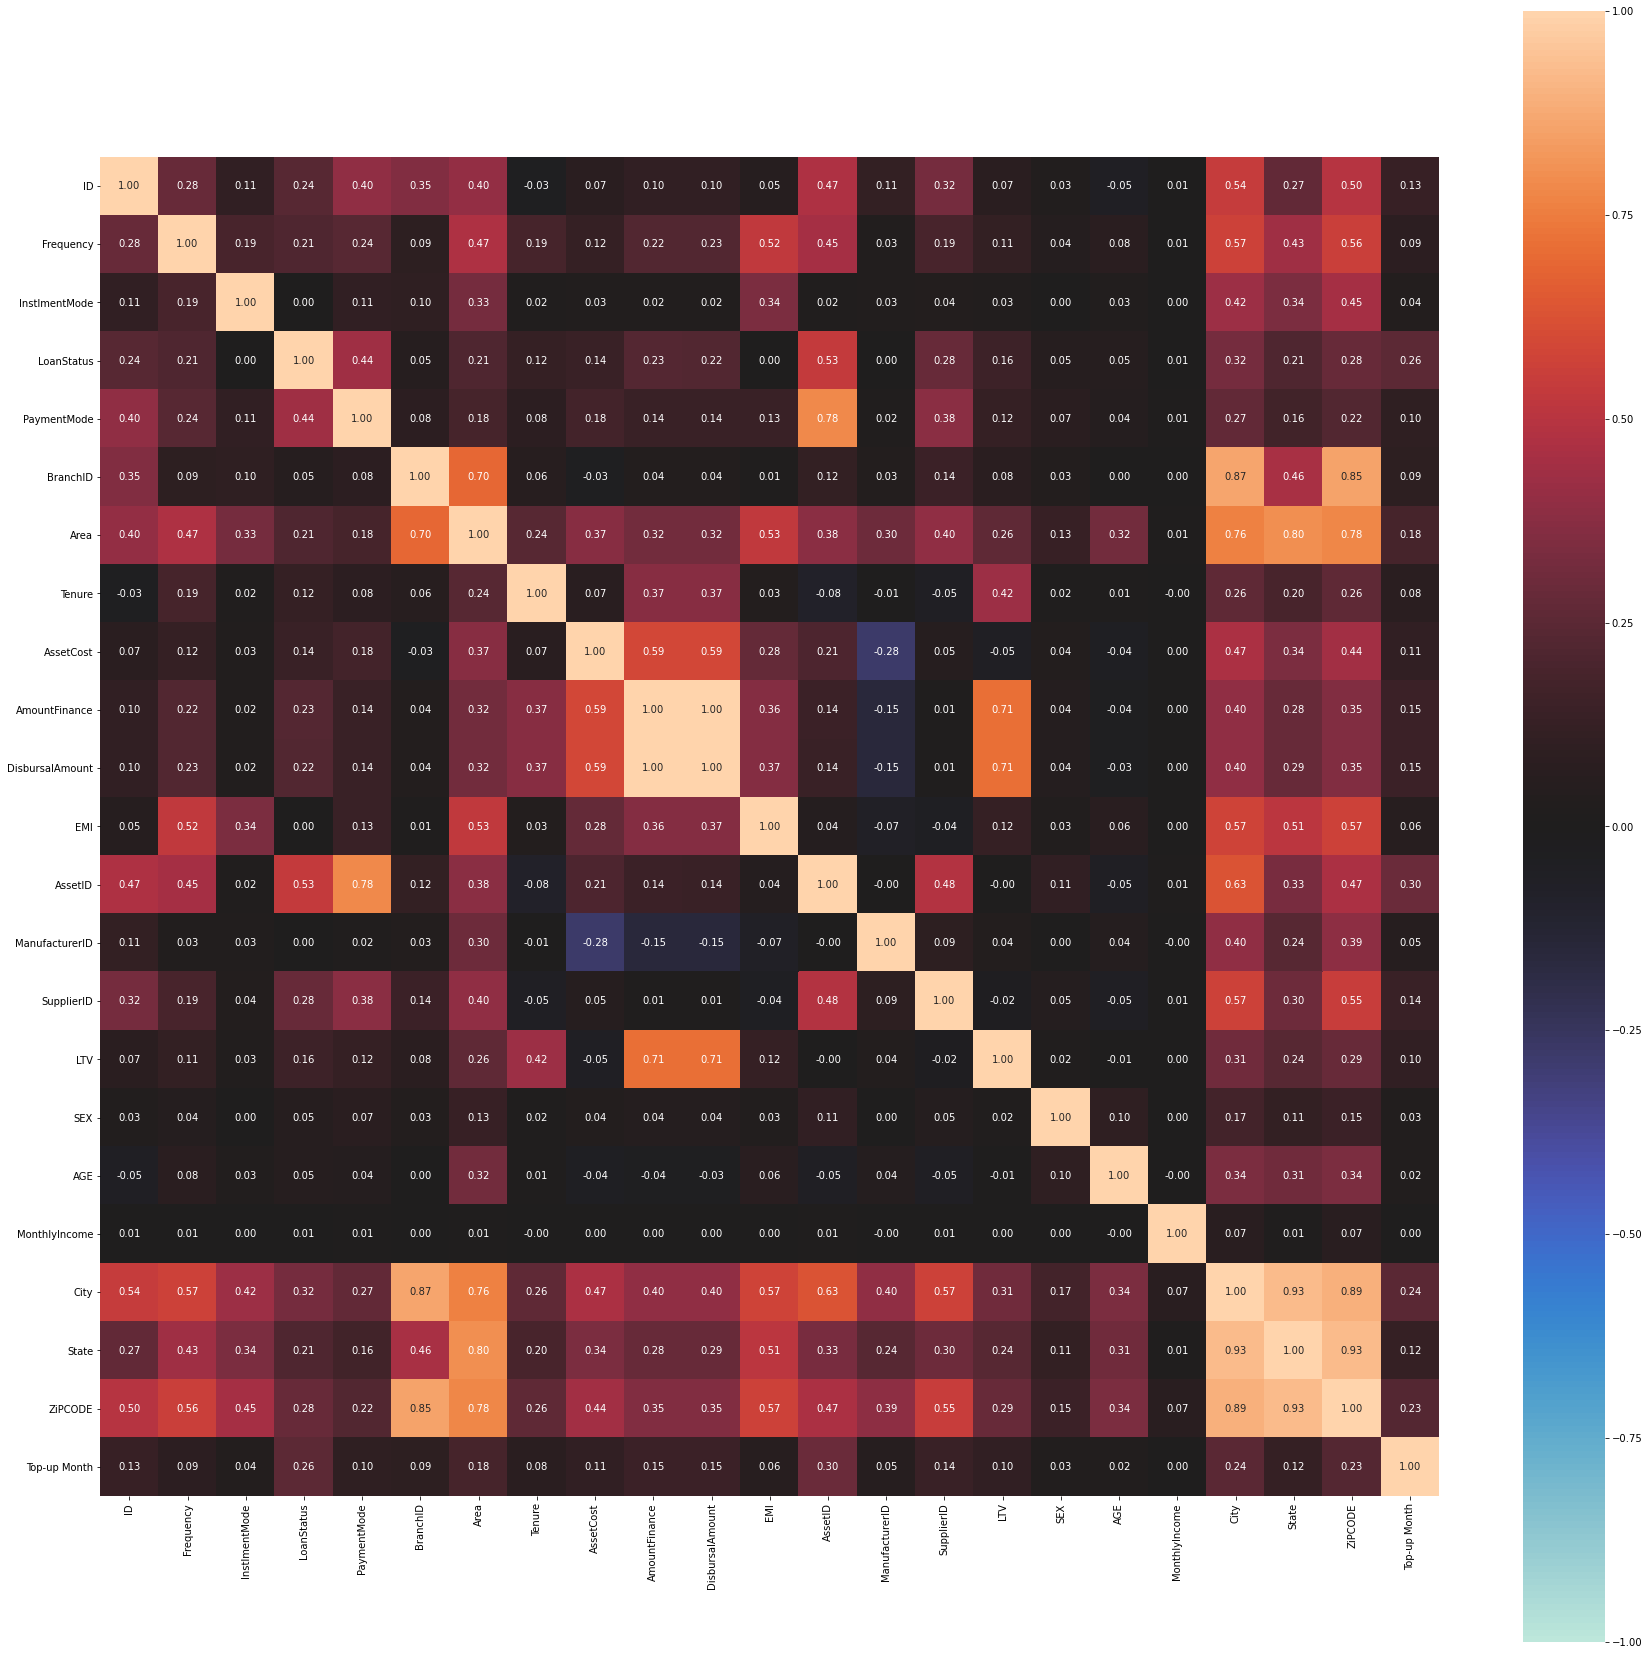

{'corr':                        ID  Frequency  InstlmentMode  LoanStatus  PaymentMode  \
 ID               1.000000   0.284527       0.106952    0.235857     0.395541   
 Frequency        0.284527   1.000000       0.194070    0.214376     0.240410   
 InstlmentMode    0.106952   0.194070       1.000000    0.000000     0.109156   
 LoanStatus       0.235857   0.214376       0.000000    1.000000     0.437322   
 PaymentMode      0.395541   0.240410       0.109156    0.437322     1.000000   
 BranchID         0.353583   0.092596       0.099467    0.053576     0.082433   
 Area             0.398848   0.473840       0.327224    0.211345     0.184790   
 Tenure          -0.032629   0.185161       0.021656    0.120354     0.080862   
 AssetCost        0.073852   0.117622       0.027225    0.135815     0.177892   
 AmountFinance    0.104945   0.222032       0.023571    0.228121     0.138392   
 DisbursalAmount  0.104960   0.225186       0.024993    0.224521     0.137273   
 EMI              0.

In [576]:
associations(new_data,figsize=(30,30))

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


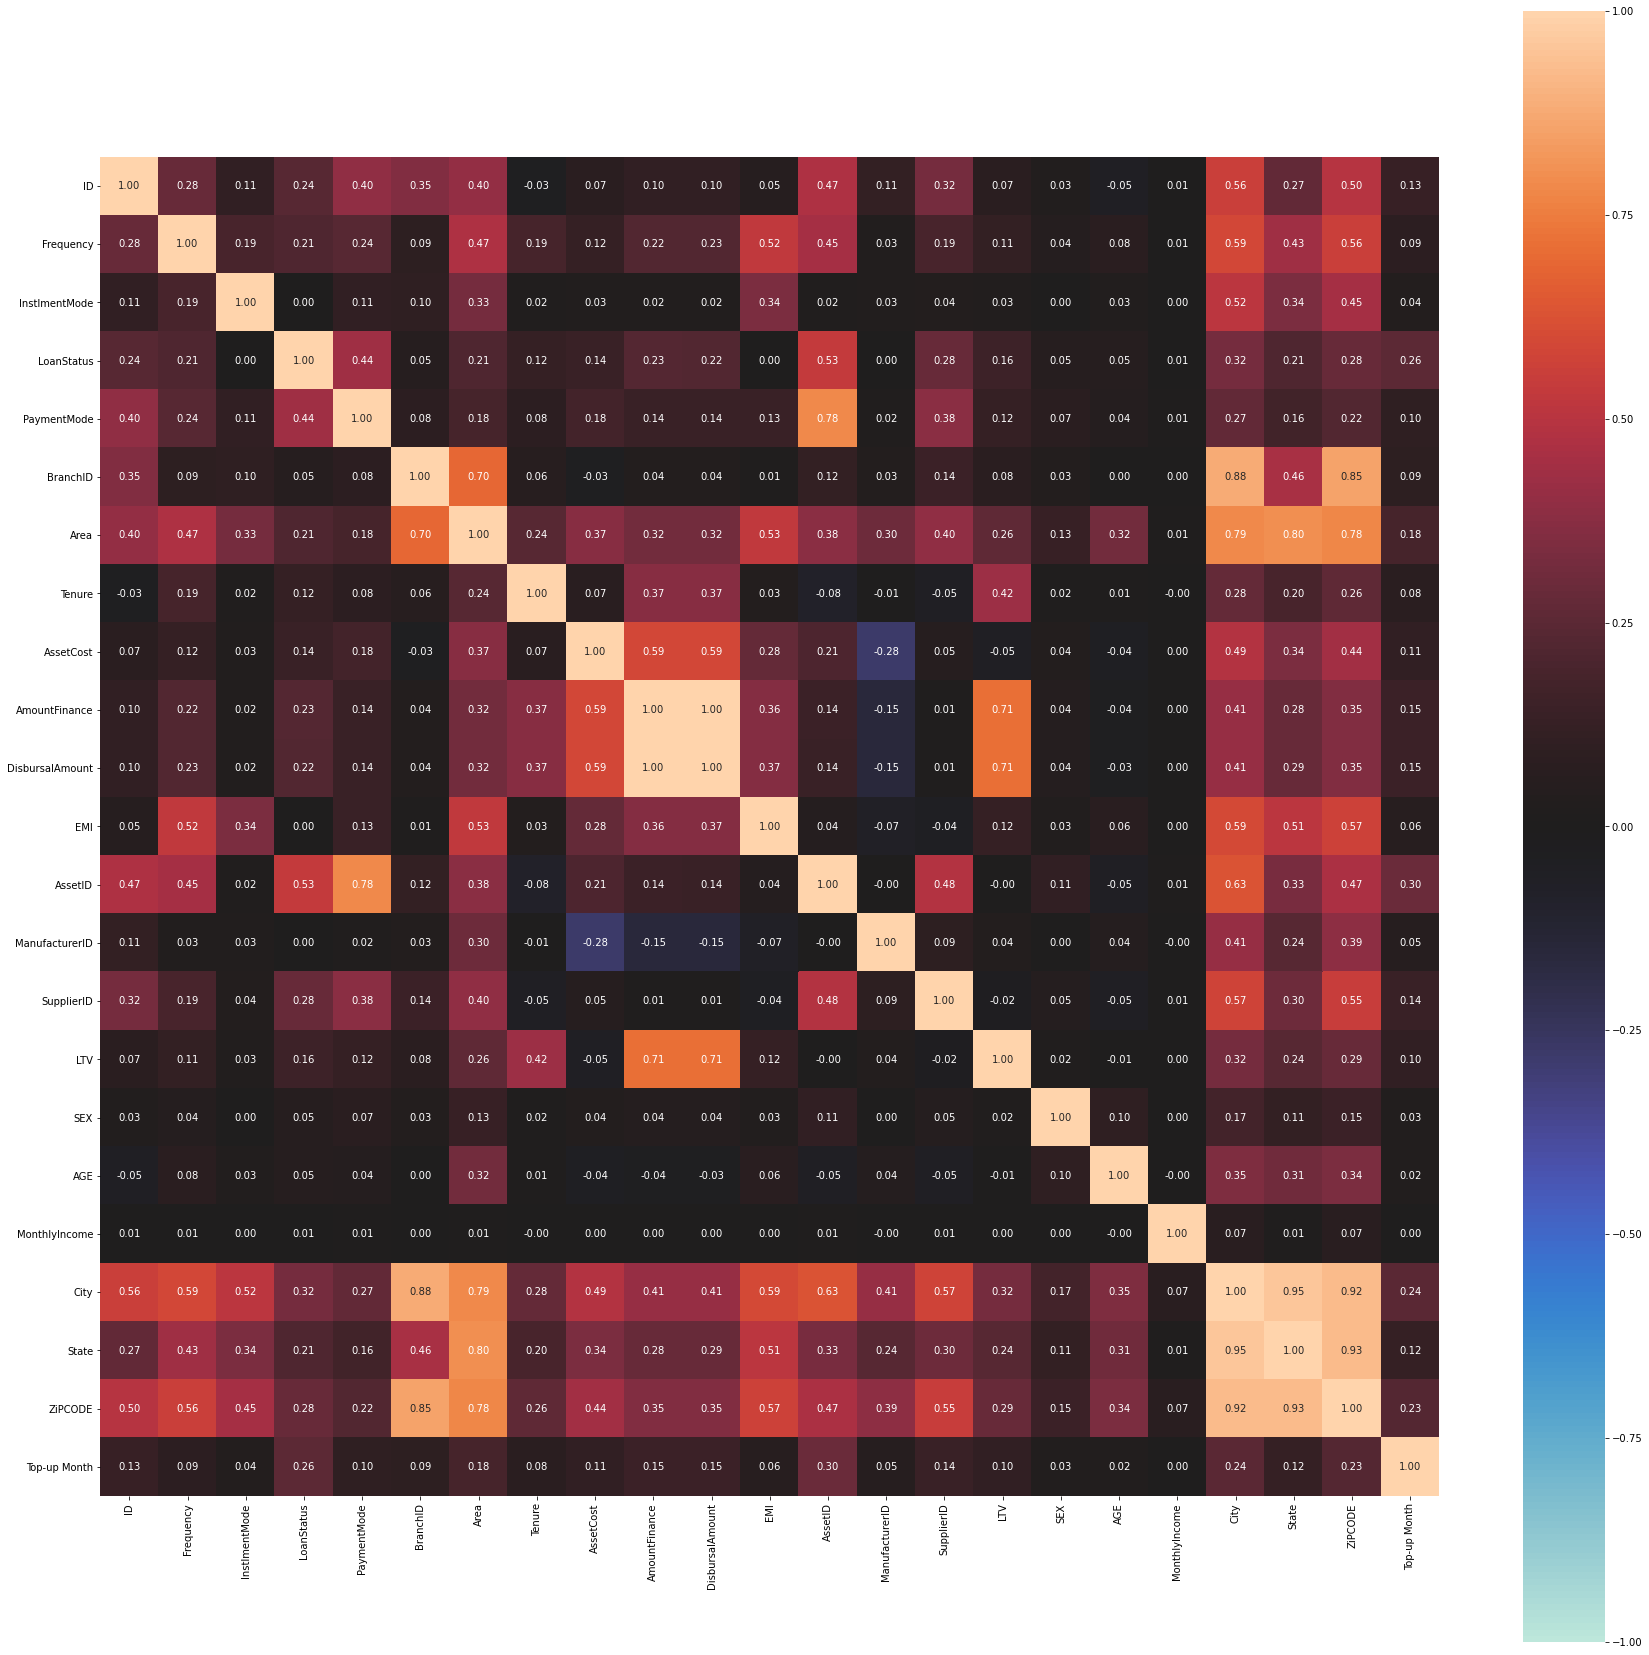

{'corr':                        ID  Frequency  InstlmentMode  LoanStatus  PaymentMode  \
 ID               1.000000   0.284527       0.106952    0.235857     0.395541   
 Frequency        0.284527   1.000000       0.194070    0.214376     0.240410   
 InstlmentMode    0.106952   0.194070       1.000000    0.000000     0.109156   
 LoanStatus       0.235857   0.214376       0.000000    1.000000     0.437322   
 PaymentMode      0.395541   0.240410       0.109156    0.437322     1.000000   
 BranchID         0.353583   0.092596       0.099467    0.053576     0.082433   
 Area             0.398848   0.473840       0.327224    0.211345     0.184790   
 Tenure          -0.032629   0.185161       0.021656    0.120354     0.080862   
 AssetCost        0.073852   0.117622       0.027225    0.135815     0.177892   
 AmountFinance    0.104945   0.222032       0.023571    0.228121     0.138392   
 DisbursalAmount  0.104960   0.225186       0.024993    0.224521     0.137273   
 EMI              0.

In [596]:
associations(new_data,figsize=(30,30))

In [587]:
new_data[(new_data['City'].isnull()) | (new_data['ZiPCODE'].isnull())]

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
37,42,Quatrly,Arrear,Closed,Billed,8,BHUBANESHWAR,24,370757,250000.0,...,1046.0,28550,57.40,M,19.0,33333.33,NaN,ORISSA,Nabarangapur,No Top-up Service
38,43,Quatrly,Arrear,Closed,PDC,8,BHUBANESHWAR,18,477500,150000.0,...,1568.0,38351,25.35,M,44.0,30833.33,NaN,ORISSA,Rayagada,No Top-up Service
39,44,Quatrly,Arrear,Closed,Billed,8,BHUBANESHWAR,36,385757,280000.0,...,1046.0,28550,64.45,M,28.0,25000.00,NaN,ORISSA,Nabarangapur,No Top-up Service
40,45,Quatrly,Arrear,Closed,Billed,8,BHUBANESHWAR,36,434268,300000.0,...,1187.0,23830,61.34,M,32.0,50000.00,NaN,ORISSA,Nabarangapur,No Top-up Service
41,46,Quatrly,Arrear,Closed,Billed,194,CUTTACK,36,499200,250000.0,...,1046.0,20641,44.59,M,43.0,16666.67,NaN,ORISSA,Kendrapara,No Top-up Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,134257,Monthly,Arrear,Closed,ECS,396,GHAZIABAD,12,560000,150000.0,...,1062.0,139099,24.55,M,39.0,33333.33,GREATER NOIDA,UTTAR PRADESH,NaN,NaN
14289,136924,Half Yearly,Arrear,Active,ECS,67,NAGPUR,37,680000,502014.0,...,1568.0,29483,73.83,M,33.0,66666.67,NAGPUR,MAHARASHTRA,NaN,NaN
14293,136939,Quatrly,Arrear,Closed,ECS,67,NAGPUR,24,660000,250788.0,...,1568.0,29483,38.00,M,36.0,57500.00,NAGPUR,MAHARASHTRA,NaN,NaN
14431,139086,Half Yearly,Arrear,Closed,ECS,198,KOTA,48,640000,452127.0,...,1568.0,99757,47.21,M,28.0,49166.67,KOTA,RAJASTHAN,NaN,NaN


In [586]:
(new_data['ZiPCODE'].isnull()).sum()

3155

In [592]:
(new_data['City'].fillna(new_data['ZiPCODE'],inplace=True))

In [595]:
(new_data['City']).isnull().sum()

0

In [594]:
(new_data['City'].fillna(new_data['State'],inplace=True))

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [599]:
big_data = data.append(data_test)

In [610]:
big_data['City'].isnull().sum()

0

In [602]:
(big_data['City'].fillna(big_data['Area'],inplace=True))

In [603]:
big_data['City'].isnull().sum()

1505

In [605]:
big_data['ZiPCODE'].isnull().sum()

3155

In [604]:
big_data['ZiPCODE']=big_data['ZiPCODE'].map(uniq_zip_dic)

In [607]:
(big_data['City'].fillna(big_data['ZiPCODE'],inplace=True))

In [609]:
(big_data['City'].fillna(big_data['State'],inplace=True))

In [611]:
big_data.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               12199
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         2
SupplierID             0
LTV                    0
SEX                   64
AGE                   66
MonthlyIncome        248
City                   0
State                  0
ZiPCODE             3155
Top-up Month       14745
dtype: int64

In [622]:
big_data.nunique().sort_values()

InstlmentMode           2
LoanStatus              2
SEX                     2
Frequency               4
Top-up Month            7
PaymentMode             9
ManufacturerID         13
State                  22
AGE                    73
Area                  103
Tenure                142
BranchID              214
ZiPCODE               415
City                  578
MaturityDAte          982
AuthDate             2713
DisbursalDate        2847
SupplierID           4971
LTV                  8070
AssetCost            8168
MonthlyIncome       12271
DisbursalAmount     21061
AmountFinance       22183
EMI                 25912
AssetID            143400
ID                 143400
dtype: int64

In [625]:
big_data['Tenure'].unique()

array([ 48,  47,  68,  44,  46,  33, 240,  35,  36,  38,  13,  12,  60,
        24,  54,  18,  23,  17,  72,  22,  20,  15,  30,  11,  34,  45,
        29,  59,  53,  37,  42,  41,  25,  31,  27,  16,  21, 234,  39,
        57,  50,  10, 138,  32, 180,  51, 135,  28,  40,  52,  58,  66,
        84,  62,  49,  26,  61,  56,  55, 354,   9, 342,  43, 336, 330,
        19, 318, 324, 300, 294, 282, 288, 276, 270, 252, 264, 246, 258,
        69, 165, 228, 222,  71, 210, 204, 216, 198, 192, 150, 174, 168,
       186,  78,  82, 162, 156,  67, 141, 144,  79,  91,  92,  95,  90,
       312, 306,  83,  81,  70,  73,  86,   8,  14,   6,   7,  64,  63,
       102,  80,  65, 132,  96,  85,  74,  75, 151, 120, 171,  89, 107,
         5,  99, 126, 106, 110,  76,  77, 112, 501,  93, 117, 108],
      dtype=int64)

In [615]:
fre_dict = {'Monthly':1, 'Quatrly':3, 'Half Yearly':6, 'BI-Monthly':0.5}

In [616]:
big_data['Frequency']=big_data['Frequency'].map(fre_dict)

In [620]:
#find a optimise way to do this 
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('PDC_E', 'PDC', regex=True)
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('Cheque', 'PDC', regex=True)

In [624]:
big_data.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [665]:
X = big_data[['ID','Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'Tenure', 'AssetCost', 'AmountFinance','City',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'Top-up Month']]

In [666]:
X.isnull().sum().sort_values()

ID                     0
LTV                    0
AuthDate               0
DisbursalDate          0
EMI                    0
City                   0
AmountFinance          0
DisbursalAmount        0
Tenure                 0
PaymentMode            0
LoanStatus             0
InstlmentMode          0
Frequency              0
AssetCost              0
MaturityDAte           1
SEX                   64
AGE                   66
MonthlyIncome        248
Top-up Month       14745
dtype: int64

In [667]:
X['AGE'].mean()

40.62054362537849

In [668]:
X['AGE'].fillna(40.6,inplace=True)

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [669]:
X.groupby(['AGE'])['MonthlyIncome'].transform('mean')

0        47425.876345
1        44413.691817
2        45098.437186
3        45348.080927
4        46096.110977
             ...     
14740        1.000000
14741        1.000000
14742        1.000000
14743        1.000000
14744        1.000000
Name: MonthlyIncome, Length: 143400, dtype: float64

In [670]:
X['MonthlyIncome'].fillna(X.groupby(['AGE'])['MonthlyIncome'].transform('mean'),inplace=True)

In [671]:
X.SEX.value_counts()

M    136273
F      7063
Name: SEX, dtype: int64

In [672]:
X['SEX'].fillna('M',inplace=True)

In [673]:
X.ManufacturerID.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ManufacturerID'

In [674]:
X['ManufacturerID'].fillna(1046.0,inplace=True)

KeyError: 'ManufacturerID'

In [675]:
X.MaturityDAte.value_counts()

2018-06-10    2788
2017-06-10    2735
2017-12-10    2691
2019-06-10    2666
2021-06-10    2569
              ... 
2015-02-08       1
2011-03-18       1
2014-01-26       1
2022-03-03       1
2013-12-22       1
Name: MaturityDAte, Length: 982, dtype: int64

In [676]:
X['MaturityDAte'].fillna('2018-06-10',inplace=True)

In [677]:
X['MaturityDAte']=pd.to_datetime(X['MaturityDAte'])


<ipython-input-677-8676ac7c13ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MaturityDAte']=pd.to_datetime(X['MaturityDAte'])


In [678]:
X.dtypes

ID                          int64
Frequency                 float64
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
City                       object
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
Top-up Month               object
dtype: object

In [679]:

X['DisbursalDate_year']=X['DisbursalDate'].dt.year

X['MaturityDAte_year']=X['MaturityDAte'].dt.year

X['AuthDate_year']=X['AuthDate'].dt.year

<ipython-input-679-dd0a86d770a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DisbursalDate_year']=X['DisbursalDate'].dt.year
<ipython-input-679-dd0a86d770a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MaturityDAte_year']=X['MaturityDAte'].dt.year
<ipython-input-679-dd0a86d770a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [680]:
X.drop(['DisbursalDate','MaturityDAte','AuthDate'],1,inplace=True)

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [681]:
X.dtypes

ID                      int64
Frequency             float64
InstlmentMode          object
LoanStatus             object
PaymentMode            object
Tenure                  int64
AssetCost               int64
AmountFinance         float64
City                   object
DisbursalAmount       float64
EMI                   float64
LTV                   float64
SEX                    object
AGE                   float64
MonthlyIncome         float64
Top-up Month           object
DisbursalDate_year      int64
MaturityDAte_year       int64
AuthDate_year           int64
dtype: object

In [682]:
big_data['InstlmentMode'].unique()

array(['Arrear', 'Advance'], dtype=object)

In [683]:
yy=X.copy()

In [684]:
yy.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Tenure,AssetCost,AmountFinance,City,DisbursalAmount,EMI,LTV,SEX,AGE,MonthlyIncome,Top-up Month,DisbursalDate_year,MaturityDAte_year,AuthDate_year
0,1,1.0,Arrear,Closed,PDC,48,450000,275000.0,RAISEN,275000.0,24000.0,61.11,M,49.0,35833.33,> 48 Months,2012,2016,2012
1,2,1.0,Advance,Closed,PDC,47,485000,350000.0,SEHORE,350000.0,10500.0,70.00,M,23.0,666.67,No Top-up Service,2012,2016,2012
2,3,3.0,Arrear,Active,Direct Debit,68,690000,519728.0,BHOPAL,519728.0,38300.0,69.77,M,39.0,45257.00,12-18 Months,2017,2023,2017
3,7,1.0,Advance,Closed,Billed,48,480000,400000.0,ASHOK NAGAR,400000.0,11600.0,80.92,M,24.0,20833.33,> 48 Months,2013,2017,2013
4,8,1.0,Arrear,Closed,Billed,44,619265,440000.0,BILASPUR,440000.0,15000.0,71.05,M,56.0,27313.67,36-48 Months,2011,2015,2011


In [659]:
X=yy.copy()

In [685]:
X = pd.get_dummies(data=X,columns=['InstlmentMode','LoanStatus','PaymentMode','City','SEX'])

In [686]:
test = X[X['Top-up Month'].isnull()]

In [687]:
X.dropna(inplace=True)

In [688]:
x=X.drop('Top-up Month',1)
y=X['Top-up Month']

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


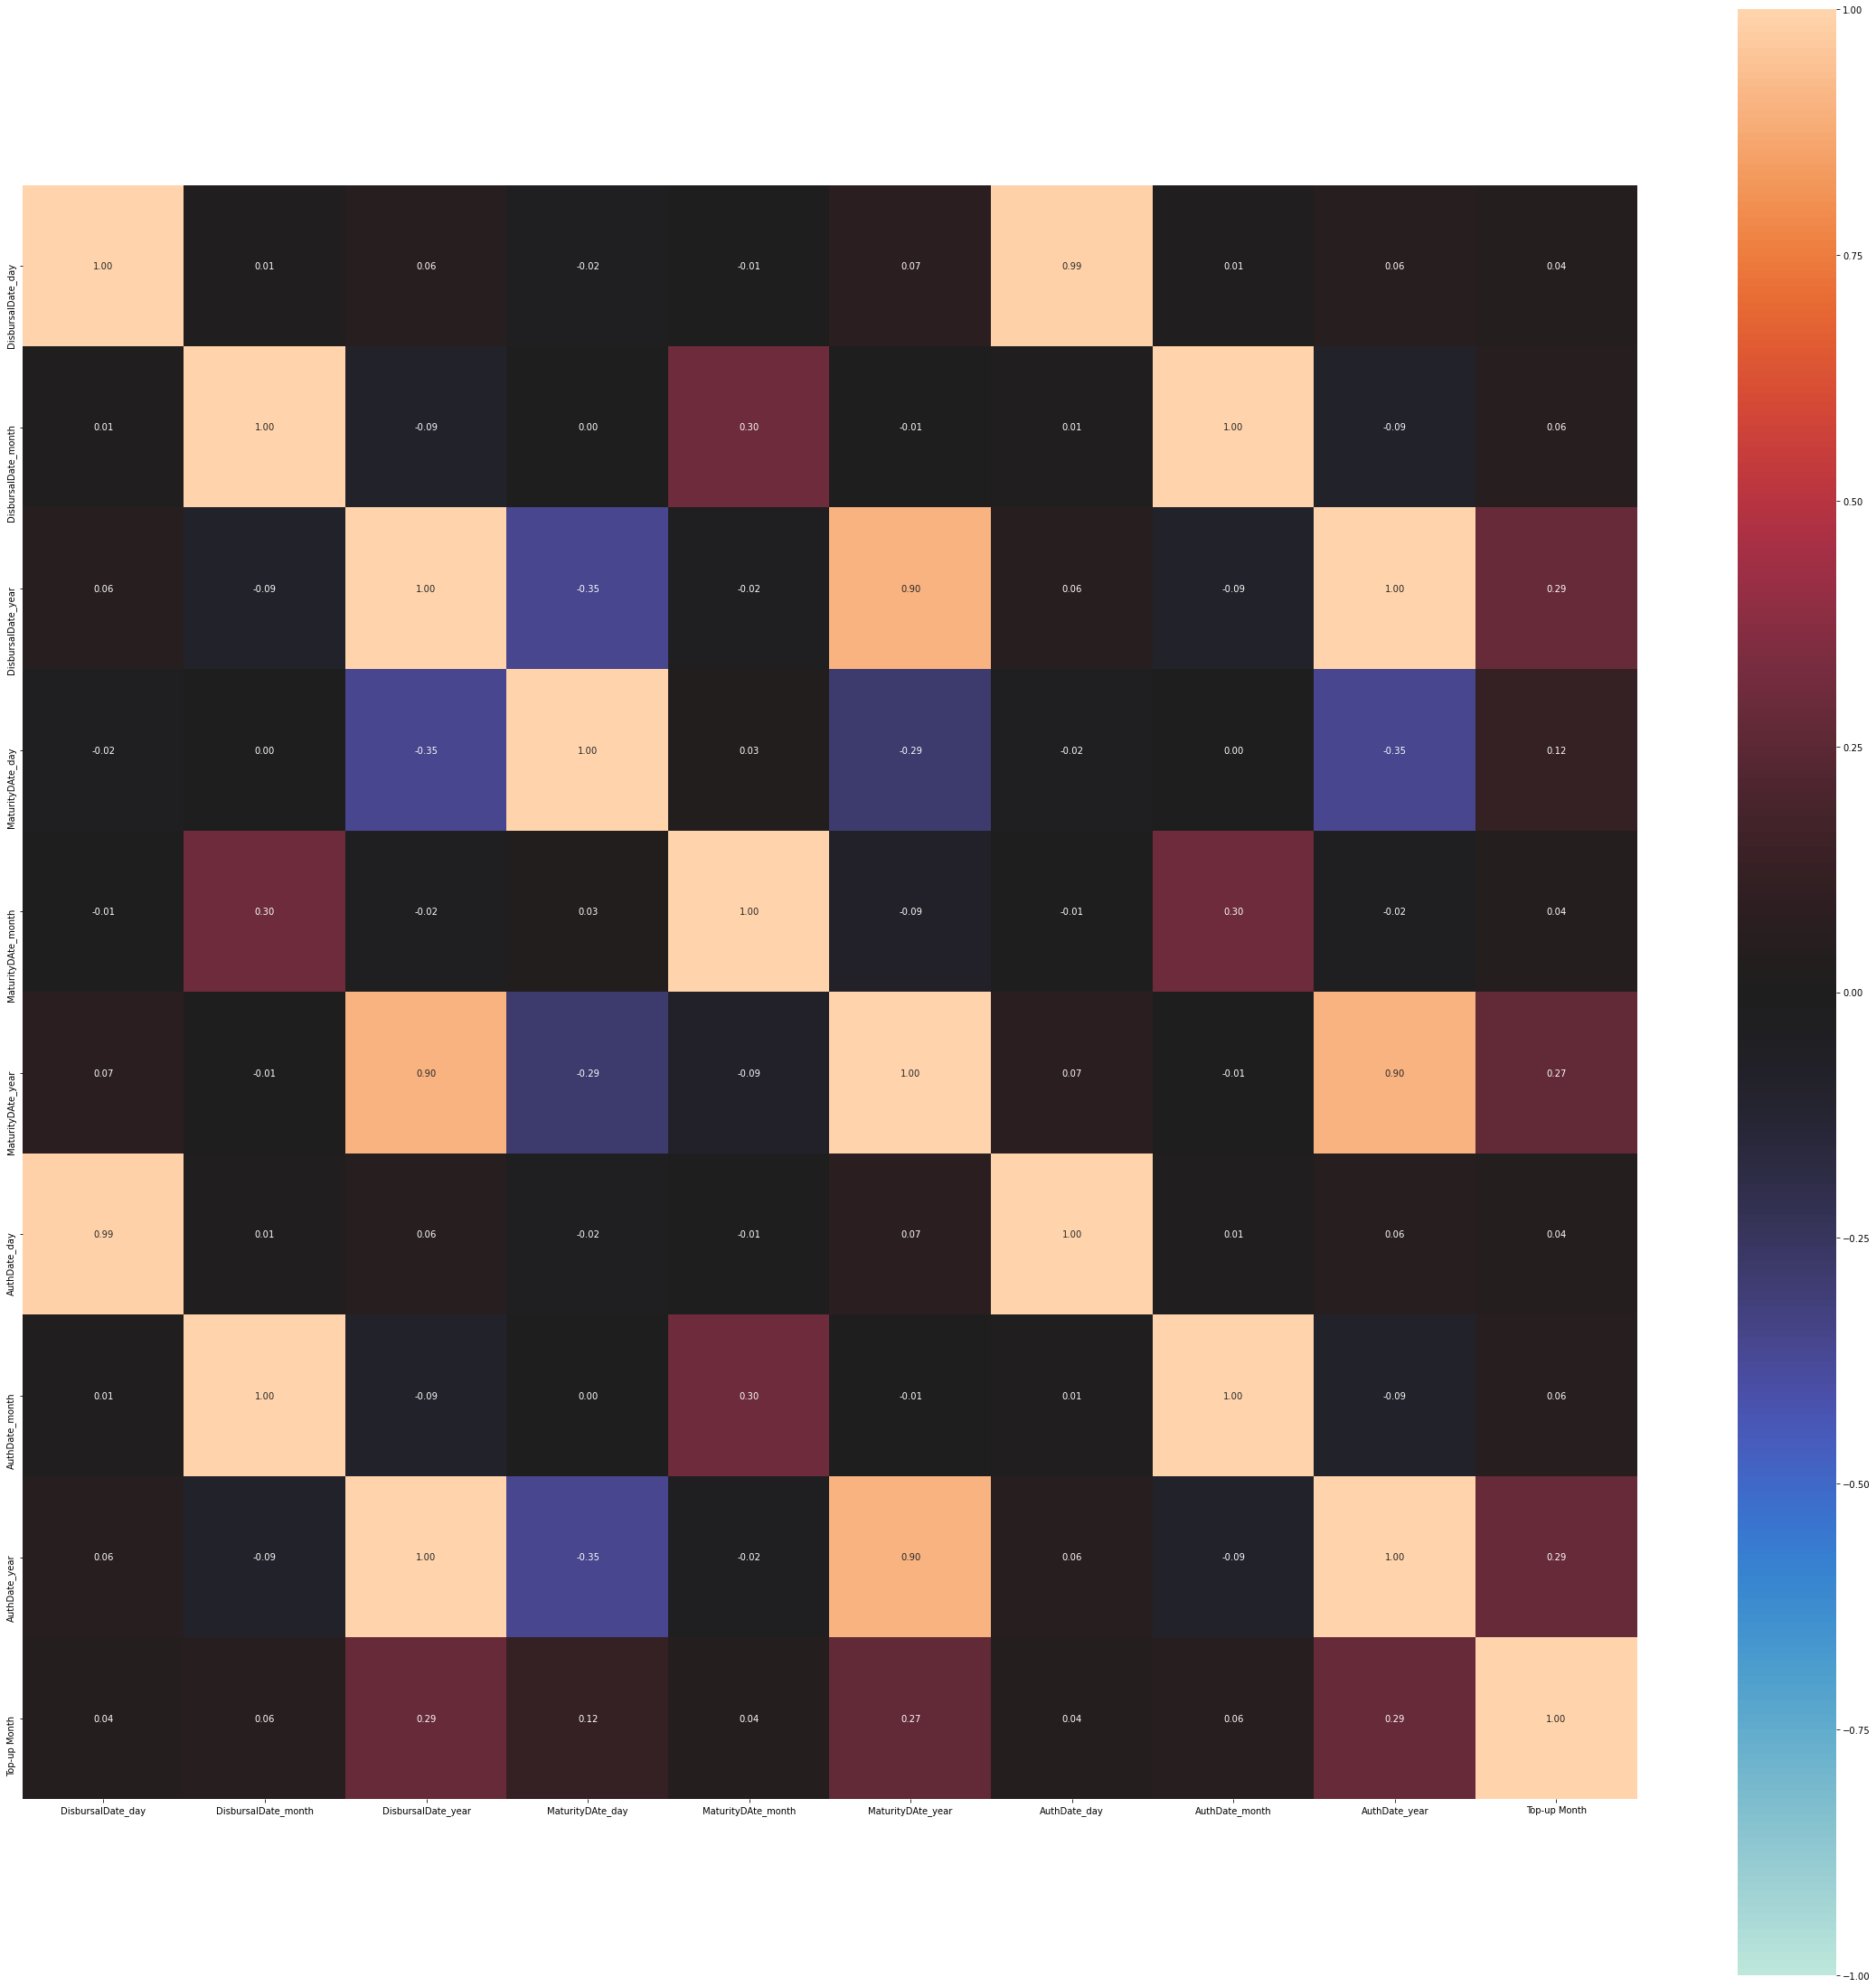

{'corr':                      DisbursalDate_day  DisbursalDate_month  \
 DisbursalDate_day             1.000000             0.014766   
 DisbursalDate_month           0.014766             1.000000   
 DisbursalDate_year            0.060481            -0.088178   
 MaturityDAte_day             -0.017504             0.001432   
 MaturityDAte_month           -0.006199             0.301583   
 MaturityDAte_year             0.073452            -0.005702   
 AuthDate_day                  0.991445             0.012039   
 AuthDate_month                0.014648             0.999183   
 AuthDate_year                 0.060547            -0.088090   
 Top-up Month                  0.043185             0.055797   
 
                      DisbursalDate_year  MaturityDAte_day  MaturityDAte_month  \
 DisbursalDate_day              0.060481         -0.017504           -0.006199   
 DisbursalDate_month           -0.088178          0.001432            0.301583   
 DisbursalDate_year             1.000000

In [664]:
associations(X[['DisbursalDate_day','DisbursalDate_month','DisbursalDate_year','MaturityDAte_day','MaturityDAte_month','MaturityDAte_year','AuthDate_day','AuthDate_month','AuthDate_year','Top-up Month']],figsize=(40,40))

In [655]:
rus = RandomUnderSampler(random_state=0)

rus.fit(x,y)

X_resampled, y_resampled = rus.fit_sample(x, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,train_size=0.80,random_state=1)

In [657]:
y_resampled.value_counts()

18-24 Months         1034
24-30 Months         1034
 > 48 Months         1034
12-18 Months         1034
No Top-up Service    1034
36-48 Months         1034
30-36 Months         1034
Name: Top-up Month, dtype: int64

In [656]:
fitknn(X_train,y_train)

Confusion Matrix:
[[66 23 29 19 20 19 14]
 [46 67 38 27 15  9 16]
 [43 46 44 40 23 17 10]
 [37 35 31 42 31 21 10]
 [32 27 26 39 51 30  9]
 [48 33 29 25 36 21 15]
 [62 29 20 22 19 16 21]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.20      0.35      0.25       190
     12-18 Months       0.26      0.31      0.28       218
     18-24 Months       0.20      0.20      0.20       223
     24-30 Months       0.20      0.20      0.20       207
     30-36 Months       0.26      0.24      0.25       214
     36-48 Months       0.16      0.10      0.12       207
No Top-up Service       0.22      0.11      0.15       189

         accuracy                           0.22      1448
        macro avg       0.21      0.22      0.21      1448
     weighted avg       0.21      0.22      0.21      1448

Accuracy: 0.2154696132596685


In [662]:
fitsvm(X_train,y_train)

Confusion Matrix:
[[75 21  6  4 22 39 23]
 [55 59 27  6 26 22 23]
 [49 37 34 13 40 35 15]
 [48 22 21 13 50 39 14]
 [31 13 20 13 75 51 11]
 [36 21 22  8 52 51 17]
 [67 27 13  5 25 27 25]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.21      0.39      0.27       190
     12-18 Months       0.29      0.27      0.28       218
     18-24 Months       0.24      0.15      0.19       223
     24-30 Months       0.21      0.06      0.10       207
     30-36 Months       0.26      0.35      0.30       214
     36-48 Months       0.19      0.25      0.22       207
No Top-up Service       0.20      0.13      0.16       189

         accuracy                           0.23      1448
        macro avg       0.23      0.23      0.22      1448
     weighted avg       0.23      0.23      0.22      1448

Accuracy: 0.2292817679558011


KeyboardInterrupt: 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=.99,random_state=1)

In [690]:
fitknn(X_train,y_train)

Confusion Matrix:
[[   16     0     0     2     1     2  1656]
 [    1     0     2     2     0     0   210]
 [    1     1     1     0     2     1   486]
 [    4     1     5     8     1     0   673]
 [    5     0     2     6     1     2   618]
 [    6     0     1     3     5     3   732]
 [  135     1    14    48    41    27 21005]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.10      0.01      0.02      1677
     12-18 Months       0.00      0.00      0.00       215
     18-24 Months       0.04      0.00      0.00       492
     24-30 Months       0.12      0.01      0.02       692
     30-36 Months       0.02      0.00      0.00       634
     36-48 Months       0.09      0.00      0.01       750
No Top-up Service       0.83      0.99      0.90     21271

         accuracy                           0.82     25731
        macro avg       0.17      0.15      0.14     25731
     weighted avg       0.70      0.82      0.75   

In [ ]:
fitsvm(X_train,y_train)